In [13]:
from nltk.tokenize.casual import casual_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re
import pandas as pd
import string
import os
from timeit import default_timer as timer

input_filepath="../../data/clean/"
pd.set_option('display.max_rows', 150)
filename="trisma2016_cleaned_text_by_lga_and_from_user_id.csv"

In [17]:
tweetdf=pd.read_csv(os.path.join(input_filepath, filename),header=0, keep_default_na=False)
docs = tweetdf[['lga','from_user_id','cleaned']][tweetdf.cleaned != '']
docs.columns = ['LGA','from_user_id','cleaned']
docs

,LGA,from_user_id,cleaned
0,Albury,766581,who actually thinks it is ok to bring mccafe d...
1,Albury,2405601,road trip playlist happy friday my funky bunch...
2,Albury,5372792,amazing day working with the film crew to crea...
3,Albury,5641092,what exactly is the point of stay signed in bo...
4,Albury,5918802,i'm at commercial club in albury nsw
5,Albury,6221342,just finished running 11.17 km in 1h 11m 48s w...
6,Albury,6434942,she is so beautiful happy chocolate day may th...
7,Albury,6518622,they're all dodging taxes and thus have lower ...
8,Albury,6916182,hello new south wales how are you oh see that ...
9,Albury,12266342,i'm at early bird cafe in albury nsw


In [19]:
# Set up Vectorizer for use with pre-cleaned and tokenized data
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def smc_tokeniser(doc):
    #return doc.split(' ')
    return [ps.stem(w) for w in doc.split(' ')]

tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=smc_tokeniser,
    ngram_range=(1,3),
    max_features=500,
    stop_words='english',
    token_pattern=None)  

In [20]:
tfidf_vectors = tfidf.fit_transform(docs['cleaned'])
print(len(tfidf.vocabulary_))

features = np.array(tfidf.get_feature_names())
print('Number of features', len(features))


500
Number of features 500


In [21]:
def top_tfidf_feats(row, features, top_n=25):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

#Return top features amongst documents in rows indentified by indices in grp_ids
def top_mean_feats(tfs, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    if grp_ids:
        D = tfs[grp_ids].toarray()
    else:
        D = tfs.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [22]:
top_features = top_mean_feats(tfidf_vectors,features, top_n=100)
top_features

,feature,tfidf
0,thi,0.045794
1,day,0.034956
2,new,0.026604
3,beach,0.024850
4,just,0.024586
5,great,0.024458
6,nsw,0.023088
7,love,0.023026
8,i'm,0.022464
9,wa,0.022448


In [23]:
target_df = pd.read_csv(input_filepath+"cleaned_target.csv")
target_df = target_df[(target_df["Type"]=='Rate per 100,000 population') & (target_df['Year'] == 2016)].dropna()
target_df = target_df[['LGA', 'Assault - domestic violence', 'Assault - non-domestic violence', 'Fraud', 
                             'Sexual Offences', 'Malicious damage to property', 'Prohibited weapons offences']]
target_df = target_df[['LGA']].join(np.log(target_df[target_df.columns[1:]])).reset_index(drop=True)
target_df

,LGA,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences
0,Albury,6.299733,6.334338,6.263887,5.378146,7.181636,5.756704
1,Armidale Regional,6.217540,6.481927,6.734923,5.398352,7.703918,5.659568
2,Ballina,5.544054,5.772687,6.223344,5.042361,6.678706,5.027093
3,Bathurst Regional,6.084028,6.136396,6.531605,5.300932,7.076881,5.422629
4,Bayside,5.755702,5.613635,6.590862,4.448712,6.371043,4.687338
5,Bega Valley,5.743838,5.833989,5.762531,5.031643,6.697170,5.031643
6,Bellingen,5.632005,5.574846,5.514222,4.756536,6.405194,4.533393
7,Berrigan,5.164719,4.941576,5.095726,4.402579,6.551014,5.634723
8,Blacktown,6.387513,6.116154,6.710620,5.099780,6.888318,5.002186
9,Bland,5.852780,5.752696,5.641471,5.373207,6.614920,5.943752


In [24]:
# Only keep docs for target LGAs:
docs = docs.merge(target_df[['LGA']], on='LGA')
docs

,LGA,from_user_id,cleaned
0,Albury,766581,who actually thinks it is ok to bring mccafe d...
1,Albury,2405601,road trip playlist happy friday my funky bunch...
2,Albury,5372792,amazing day working with the film crew to crea...
3,Albury,5641092,what exactly is the point of stay signed in bo...
4,Albury,5918802,i'm at commercial club in albury nsw
5,Albury,6221342,just finished running 11.17 km in 1h 11m 48s w...
6,Albury,6434942,she is so beautiful happy chocolate day may th...
7,Albury,6518622,they're all dodging taxes and thus have lower ...
8,Albury,6916182,hello new south wales how are you oh see that ...
9,Albury,12266342,i'm at early bird cafe in albury nsw


In [30]:
# Expand targets to include from_user_id:
target_df = docs[['LGA','from_user_id']].merge(target_df, on='LGA')
target_df

,LGA,from_user_id,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences
0,Albury,766581,6.299733,6.334338,6.263887,5.378146,7.181636,5.756704
1,Albury,2405601,6.299733,6.334338,6.263887,5.378146,7.181636,5.756704
2,Albury,5372792,6.299733,6.334338,6.263887,5.378146,7.181636,5.756704
3,Albury,5641092,6.299733,6.334338,6.263887,5.378146,7.181636,5.756704
4,Albury,5918802,6.299733,6.334338,6.263887,5.378146,7.181636,5.756704
5,Albury,6221342,6.299733,6.334338,6.263887,5.378146,7.181636,5.756704
6,Albury,6434942,6.299733,6.334338,6.263887,5.378146,7.181636,5.756704
7,Albury,6518622,6.299733,6.334338,6.263887,5.378146,7.181636,5.756704
8,Albury,6916182,6.299733,6.334338,6.263887,5.378146,7.181636,5.756704
9,Albury,12266342,6.299733,6.334338,6.263887,5.378146,7.181636,5.756704


In [42]:
from collections import defaultdict
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# X must be a dataframe whose last column is vector of text docs
# y must be a dataframe with one or more label columns, and last column of target.
# The first columns of y will be used as labels to return results.
def tfidf_cv(X, y, max_features=None, folds=5, n_important=10):
    assert len(X) == len(y)
    
    if not max_features:
        max_features = len(y)
    # Empty dataframe for predictions
    preds = pd.DataFrame(columns = y.columns)
    preds['predicted'] = 0
    importants = defaultdict(float)
    kf = KFold(n_splits=folds, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train_df, X_test_df = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train_df, y_test_df = y.iloc[train_index,:], y.iloc[test_index,:].copy()
        
        # Fit tfidf model for train:
        tfidf = TfidfVectorizer(analyzer='word',tokenizer=smc_tokeniser,ngram_range=(1,3),
                            max_features=max_features,stop_words='english',token_pattern=None)  
        X_train = tfidf.fit_transform(X_train_df.iloc[:,-1])
        X_test = tfidf.transform(X_test_df.iloc[:,-1])
        features = np.array(tfidf.get_feature_names())
        
        model = RandomForestRegressor(random_state=42)
        model.fit(X_train, y_train_df.iloc[:,-1])
        
        # Save important features
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        for f in range(len(indices)):
            importants[features[indices[f]]] += importances[indices[f]] / folds

        # Save predictions
        y_test_df['predicted'] = model.predict(X_test)
        preds = pd.concat([preds,y_test_df])
        
        print('Finished processing',len(preds),'records...')

    return preds, importants

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def tfidf_metrics(predictions, importants):
    print('MOST IMPORTANT FEATURES:')
    for w in sorted(importants, key=importants.get, reverse=True)[0:20]:
      print(w, importants[w])

    r2 = r2_score(predictions.iloc[:,-2],predictions.iloc[:,-1])
    rmse = np.sqrt(mean_squared_error(predictions.iloc[:,-2],predictions.iloc[:,-1]))
    print('R2:',r2)
    print('RMSE:',rmse)

    y = predictions.iloc[:,-2]
    pred = predictions.iloc[:,-1                   ]
    fig, ax = plt.subplots()
    ax.scatter(y, pred, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.show()    

Try increasing max features to test the boundaries of where overfitting begins...

Finished processing 11475 records...
Finished processing 22950 records...
Finished processing 34424 records...
Finished processing 45898 records...
Finished processing 57372 records...
Finished TF-IDF 5 fold cross validation in 1189.2883085119538 seconds
MOST IMPORTANT FEATURES:
sydney 0.084917782851
thi 0.0299912370863
day 0.0238460571894
today 0.0177230897104
just 0.0169992624578
new 0.0158282125035
great 0.0153120017218
love 0.0151367689306
i'm 0.0150072396504
time 0.0149286810958
good 0.0145510250705
wa 0.0143419952264
it' 0.013731360352
look 0.0133433883718
morn 0.0128007095099
beach 0.0126783735722
nsw 0.0123790147268
work 0.0123171067993
thank 0.0117934034946
like 0.0115399951648
R2: 0.0553967675577
RMSE: 0.605856629369


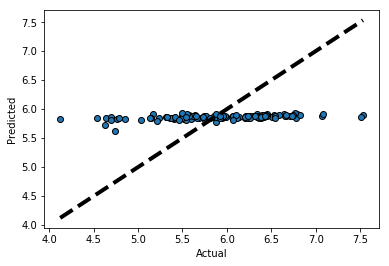

Finished processing 11475 records...
Finished processing 22950 records...
Finished processing 34424 records...
Finished processing 45898 records...
Finished processing 57372 records...
Finished TF-IDF 5 fold cross validation in 1600.3699804299977 seconds
MOST IMPORTANT FEATURES:
sydney 0.0440498435064
harbour 0.0327763691284
#sydney 0.0204629004387
thi 0.0162660918863
day 0.0141280869368
today 0.00975331832415
bridg 0.00923760857211
just 0.0090636481809
great 0.00902778914767
new 0.00888829274508
love 0.00836119673998
i'm 0.00813292484103
beach 0.00808394119836
time 0.00799641756535
good 0.00787433742109
it' 0.00733984481594
wa 0.00717129837631
nsw 0.00712274132078
work 0.00681933863076
morn 0.00675673954735
R2: 0.0841736599254
RMSE: 0.596556683565


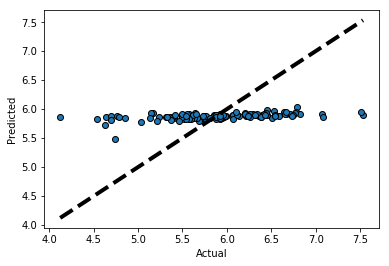

In [31]:
for f in [200,500]:
    start = timer()
    predictions, importants = tfidf_cv(docs, target_df[['LGA','from_user_id','Assault - domestic violence']], max_features=f, folds=5)
    end = timer()
    print('Finished TF-IDF 5 fold cross validation in',end-start,'seconds')
    # Need to aggregate preds from from_user_id back up to LGA level before checking metrics:
    predictions = predictions[['LGA','from_user_id','Assault - domestic violence',
                               'predicted']].groupby(['LGA']).agg({'Assault - domestic violence': lambda x: np.mean(x),
                                                                  'predicted': lambda x: np.mean(x)}).reset_index()
    tfidf_metrics(predictions, importants)

500 has improved, no reason not to step it up substantially. Will try 5000 and hope for an acceptable runtime. Run an analysis on all 6 target variables. Store the results for later use in other models:

Assault - domestic violence
Finished processing 11475 records...
Finished processing 22950 records...
Finished processing 34424 records...
Finished processing 45898 records...
Finished processing 57372 records...
Finished TF-IDF 5 fold cross validation in 3450.9366241449025 seconds
MOST IMPORTANT FEATURES:
sydney harbour 0.0552054705512
kiama 0.0191824070769
#sydney 0.0154407458045
coff 0.00986615977825
dubbo 0.00925708702792
sydney 0.00848917814079
hunter 0.00843257167411
thi 0.00748895646112
manli 0.00698153175386
broken hill 0.00625613713556
day 0.00609759229518
brooklyn 0.0057827478622
newcastl 0.00484123250991
wagga 0.00427701752762
just 0.00412909916854
today 0.003919147623
great 0.00381143923628
central 0.00367786853885
tamworth 0.00362206401674
love 0.00354648258993
R2: 0.212965818149
RMSE: 0.553021413629


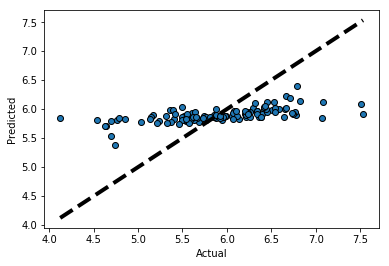

Assault - non-domestic violence
Finished processing 11475 records...
Finished processing 22950 records...
Finished processing 34424 records...
Finished processing 45898 records...
Finished processing 57372 records...
Finished TF-IDF 5 fold cross validation in 3912.385767142987 seconds
MOST IMPORTANT FEATURES:
byron 0.0166766465026
newcastl 0.0140119929427
sydney harbour 0.0139346603881
thi 0.0089224657406
sydney 0.00887788645847
blue mountain 0.00809489350588
#sydney 0.00651141942883
day 0.00582861272466
great 0.00559726645013
bowral 0.00556607089659
just 0.00465636854001
today 0.00463147506293
dubbo 0.00442366773411
good 0.00429986874248
new 0.00428181180626
thank 0.00413845828501
love 0.00411975562168
talk 0.00368872128973
time 0.00363930534828
it' 0.00360128639325
R2: 0.109846249172
RMSE: 0.52345384331


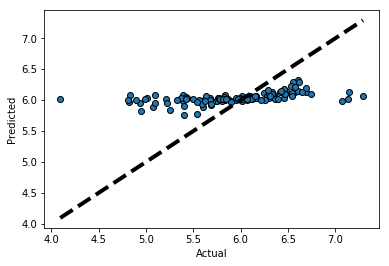

Fraud
Finished processing 11475 records...
Finished processing 22950 records...
Finished processing 34424 records...
Finished processing 45898 records...
Finished processing 57372 records...
Finished TF-IDF 5 fold cross validation in 3534.8608173599932 seconds
MOST IMPORTANT FEATURES:
sydney 0.0112074270618
newcastl 0.00997984649475
mountain 0.0097105344743
south 0.00967859477036
thi 0.00795664631598
#sydney 0.0079432619024
kiama 0.00774088332027
snowi 0.00701348884309
byron 0.00696625565077
great 0.00633163867786
sydney harbour 0.00582807073776
nsw 0.00542694993955
today 0.00486497798385
day 0.00459639780725
good 0.00443252458756
thank 0.00440144807267
perish 0.00434989557809
just 0.00407078922028
talk 0.00405738626764
love 0.00396240146511
R2: 0.0113071648985
RMSE: 0.502752943999


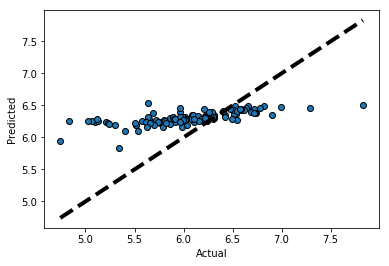

Sexual Offences
Finished processing 11475 records...
Finished processing 22950 records...
Finished processing 34424 records...
Finished processing 45898 records...
Finished processing 57372 records...
Finished TF-IDF 5 fold cross validation in 3317.8242908921093 seconds
MOST IMPORTANT FEATURES:
sydney harbour 0.0328780827603
dubbo 0.01101515213
kiama 0.0108369899223
#sydney 0.0106155249483
thi 0.00924328785351
coff 0.00787093415514
sydney 0.00720689466842
day 0.00714367703305
lismor 0.00546481307814
nsw 0.00543377488266
newcastl 0.00534293661091
tamworth 0.00490111789117
great 0.00481261181479
today 0.00463255778221
manli 0.00436941795004
new 0.00430591393927
just 0.00425008738331
broken hill 0.00421542886162
orang 0.00419930872999
good 0.00413287683194
R2: 0.227547386327
RMSE: 0.448923940314


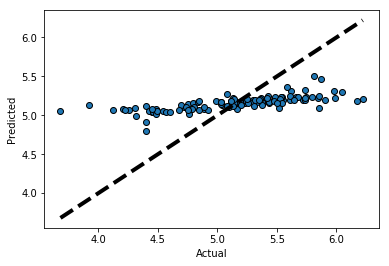

Malicious damage to property
Finished processing 11475 records...
Finished processing 22950 records...
Finished processing 34424 records...
Finished processing 45898 records...
Finished processing 57372 records...
Finished TF-IDF 5 fold cross validation in 3302.223836844787 seconds
MOST IMPORTANT FEATURES:
sydney harbour 0.0296895594519
newcastl 0.0190191786817
dubbo 0.0167143763161
#sydney 0.00919771397693
thi 0.00855307919062
armidal 0.00846096115206
kiama 0.00801845389535
sydney 0.00695705145221
day 0.00656555606323
wagga 0.00651212766353
tamworth 0.00495340540005
alburi 0.00471368998251
today 0.00466033731369
great 0.0045650596479
just 0.00451547859549
broken hill 0.00419721463538
love 0.00404033380681
thank 0.00402723508153
new 0.00402609190373
manli 0.00392877809563
R2: 0.22131496133
RMSE: 0.460195959834


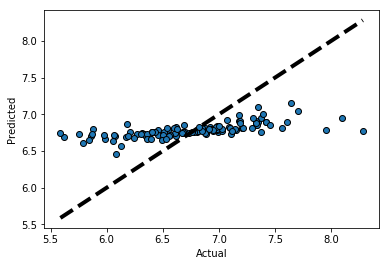

Prohibited weapons offences
Finished processing 11475 records...
Finished processing 22950 records...
Finished processing 34424 records...
Finished processing 45898 records...
Finished processing 57372 records...
Finished TF-IDF 5 fold cross validation in 3433.912940960843 seconds
MOST IMPORTANT FEATURES:
sydney harbour 0.0367742000837
#sydney 0.014410473283
wagga 0.0117424915675
sydney 0.00987537800557
thi 0.00819350762665
day 0.00715844590239
dubbo 0.00712466117508
blue mountain 0.006999511203
hunter 0.00622679072053
alburi 0.00500770958216
great 0.0047613127589
manli 0.0046611267702
just 0.00424889534283
love 0.00406421231128
today 0.00402209167021
tamworth 0.0038809437053
new 0.00386102086221
good 0.00356186721341
it' 0.00352405552386
thank 0.00334139094354
R2: 0.19663753155
RMSE: 0.696647287739


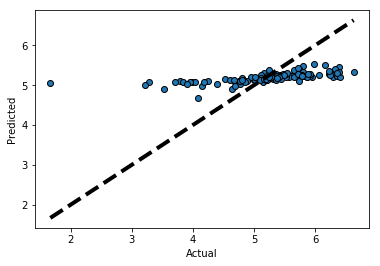

In [46]:
tfidf_output = pd.DataFrame()
for target in target_df.columns[2:]: # Start from 2 as we have a 2 column index
    print(target)
    start = timer()
    preds = pd.DataFrame()
    preds, importants = tfidf_cv(docs, target_df[['LGA','from_user_id',target]], max_features=5000, folds=5)
    end = timer()
    print('Finished TF-IDF 5 fold cross validation in',end-start,'seconds')
    # Need to aggregate preds from from_user_id back up to LGA level before checking metrics:
    preds = preds[['LGA','from_user_id',target,
                    'predicted']].groupby(['LGA']).agg({target: lambda x: np.mean(x),
                                                    'predicted': lambda x: np.mean(x)}).reset_index()
    tfidf_metrics(preds, importants)
    if len(tfidf_output.columns) == 0:
        tfidf_output['LGA'] = preds['LGA']
    tfidf_output['TF-IDF '+target] = preds[preds.columns[-1]]

In [48]:
tfidf_output.to_csv("../../data/clean/tfidf_by_lga_and_from_user_id_2016_predictions.csv",index=False)

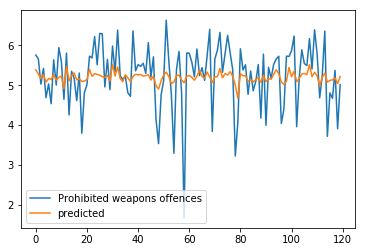

In [50]:
preds.plot()